PROJETO FINAL DATA SCIENCE - INFINITY SCHOOL

Banco de dados de um ecommerce de roupas femininas, retirado da biblioteca Kaggle Nome: Angelo Rafael Garcia de Almeida Github: https://github.com/Angelorafaelgarcia/machine_learning-ecommerce_sales_data

Pacotes do Python, são conjuntos de funcionalidades chamados de bibliotecas disponíveis da ferramenta. A primeira coisa que temos que fazer é importar os pacotes que iremos utilizar.

Pandas: Possui inúmeras funções e comandos para importar arquivos, analisar dados, tratar dados, etc.

Matplotlib: Possui uma série de funções e comandos para exibição de gráficos

Seaborn: Possui uma série de funções e comandos para exibição de gráficos (Visualizações mais robustas do que o Matplotlib)

Numpy: Possui uma série de funções e comandos para trabalharmos com números de forma em geral(formatação, calculos, etc)

Locale: Utilizado para formatação de datas, valores, dias de acordo com a região que queremos.

sklearn: fornece uma variedade de algoritmos de aprendizado de máquina e técnicas de modelagem de dados.

In [1]:
# Importando as bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import locale
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Um DataFrame do Pandas é como se fosse uma planilha do Excel, onde podemos tratar linhas e colunas.
O caminho do arquivo possivelmente pode ser editado para apresentar apenas o nome do arquivo, considerando que ele esteja na mesma pasta do notebook, colocamos o dataframe no meu github para facilitar.

In [2]:
# Comando utilizado para carregar o arquivo e armazena-lo como um DataFrame do Pandas
url = 'https://raw.githubusercontent.com/Angelorafaelgarcia/machine_learning-ecommerce_sales_data/main/women_clothing_ecommerce_sales.csv'
dataset = pd.read_csv(url)
dataset

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264
...,...,...,...,...,...,...,...,...
522,171,2022/9/9 6:27:00,799,Dark Blue,M,265,1,265
523,172,2022/9/9 7:18:00,708,Dark Blue,4XL,278,1,278
524,173,2022/9/9 7:22:00,799,Dark Blue,M,265,1,265
525,174,2022/9/9 8:25:00,799,Dark Blue,L,265,1,265


In [3]:
# Comando utilizado para verificar a quantidade de linhas e colunas do arquivo
# Colunas também são chamadas de variáveis.
dataset.shape

(527, 8)

In [4]:
dataset.describe()

,order_id,unit_price,quantity,revenue
count,527.000000,527.000000,527.000000,527.000000
mean,115.313093,274.973435,1.011385,278.024668
std,73.106716,34.517412,0.106193,44.741095
min,1.000000,191.000000,1.000000,191.000000
25%,54.000000,266.000000,1.000000,266.000000
50%,110.000000,278.000000,1.000000,278.000000
75%,166.000000,288.000000,1.000000,288.000000
max,273.000000,899.000000,2.000000,899.000000


In [5]:
# Comando utilizado para verificar informações sobre os dados(Tipo de variáveis, Variáveis, Quantidade de registros, etc)
# Neste caso a variavel order_date, deve ser do tipo Date e as variaveis unit_price e revenue do tipo Float.
# Precisamos tratar essas variáveis.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


In [6]:
# Verificar os nulos do dataset de forma direta:
# Há 37 valores nulos na coluna 'size', não irei tratá-los, mas é possível fazer algum tipo de tratamento com eles, como por exemplo retira-los do dataframe dependendo da quantidade de dados existentes ou aplicar uma média.
dataset.isnull().sum()

order_id       0
order_date     0
sku            0
color          0
size          37
unit_price     0
quantity       0
revenue        0
dtype: int64

Exemplos de como resolver os valores vazios:

Caso existisse algum valor 'vazio/none' aqui, poderíamos resolver de duas formas.

A primeira forma seria excluir todo o registro, mas estariamos perdendo dados.
data.drop(data.loc[data['unit_price']=='SEM VALOR'].index, inplace=True)

A segunda forma seria verificar o valor médio ou da mediana deste modelo e substituir a palavra SEM VALOR para um valor médio.
data.loc[data['unit_price'] == 'SEM VALOR']

Logo após substituiriamos a palavra SEM VALOR pelo valor ZERO
data.loc[(data['unit_price'] == 'SEM VALOR'), 'VALOR'] = 0

In [7]:
# Em seguida convertemos a coluna unit_price de int64 em float64
dataset['unit_price'] = dataset['unit_price'].astype(np.float64)

In [8]:
# Em seguida convertemos o campo em float
dataset['revenue'] = dataset['revenue'].astype(np.float64)

In [9]:
# Convert order_date to datetime format
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

In [10]:
# daremos um novo info para verificar se as colunas foram tratadas
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    527 non-null    int64         
 1   order_date  527 non-null    datetime64[ns]
 2   sku         527 non-null    object        
 3   color       527 non-null    object        
 4   size        490 non-null    object        
 5   unit_price  527 non-null    float64       
 6   quantity    527 non-null    int64         
 7   revenue     527 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 33.1+ KB


In [11]:
# Comando utilizado para verificar as linhas iniciais do DataFrame
dataset.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022-06-01 16:05:00,708,Dark Blue,2XL,298.0,1,298.0
1,1,2022-06-01 16:05:00,89,Dark Blue,2XL,258.0,1,258.0
2,2,2022-06-10 17:03:00,bobo,Cream,One Size,228.0,1,228.0
3,3,2022-06-10 19:59:00,799,Dark Blue,XL,264.0,1,264.0
4,4,2022-06-11 11:42:00,799,Dark Blue,M,264.0,1,264.0


In [12]:
# Comando utilizado para verificar as linhas finais do DataFrame
dataset.tail()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
522,171,2022-09-09 06:27:00,799,Dark Blue,M,265.0,1,265.0
523,172,2022-09-09 07:18:00,708,Dark Blue,4XL,278.0,1,278.0
524,173,2022-09-09 07:22:00,799,Dark Blue,M,265.0,1,265.0
525,174,2022-09-09 08:25:00,799,Dark Blue,L,265.0,1,265.0
526,175,2022-09-09 09:47:00,799,Dark Blue,XL,265.0,1,265.0


In [13]:
# Avaliar o período dos dados coletados
inicio = pd.to_datetime(dataset['order_date']).dt.date.min()
fim = pd.to_datetime(dataset['order_date']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2022-06-01 Até: 2022-09-30


In [14]:
# Dessa forma podemos agrupar os valores e identificar se há algum valor discrepante.
# Observe que não há nenhum valor que foi inserido como "SEM VALOR"
dataset.groupby(['unit_price']).size()

unit_price
191.0      6
198.0      5
206.0      1
207.0      2
223.0      1
227.0      1
228.0      9
232.0      2
238.0      5
239.0      9
245.0      5
246.0      1
248.0      3
249.0      3
254.0      2
255.0      1
258.0     21
259.0      1
264.0     20
265.0     23
266.0     81
268.0     17
269.0     20
275.0     10
277.0      1
278.0     70
286.0      2
287.0      6
288.0    134
296.0      5
297.0      1
298.0     44
315.0      8
318.0      6
899.0      1
dtype: int64

In [15]:
# Agora iremos avaliar os outliers das colunas que são númericas
# OUTLIERS são valores discrepantes que estão bem acima ou bem abaixo dos outros valores

# Vamos carregar em uma lista as variaveis que são do tipo INT64 E FLOAT64
variaveis_numericas = []
for i in dataset.columns[0:8].tolist():
        if dataset.dtypes[i] == 'int64' or dataset.dtypes[i] == 'float64':            
            print(i, ':' , dataset.dtypes[i]) 
            variaveis_numericas.append(i)

order_id : int64
unit_price : float64
quantity : int64
revenue : float64


In [16]:
# Vamos observar a lista de variáveis e avaliar se nestas variáveis temos outliers através de um boxplot
variaveis_numericas

['order_id', 'unit_price', 'quantity', 'revenue']

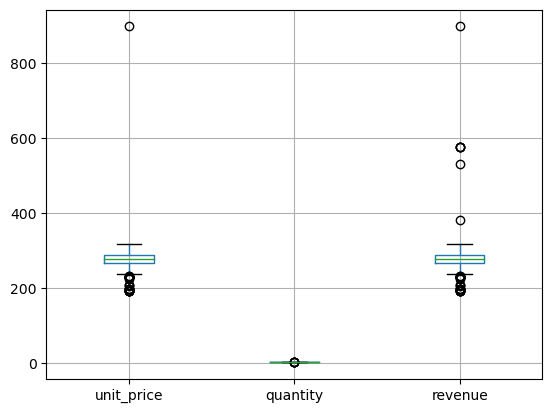

In [17]:
# Boxplots
# Boxplot é utilizado para avaliar e comparar o formato, tendência central e variabilidade de distribuições de amostra, 
# e para procurar por outliers. Por padrão, um boxplot demonstra a mediana, os quartis, 
# o intervalo interquartil(IQR) e outliers para cada variável. 

# Outlier são valores que estão bem discrepantes dentro do conjunto de dados, podem ser para mais ou para menos. 
# Observe nos DOIS ULTIMOS boxplot que há os pontinhos acima das linhas. Esses valores são outliers

dataset.boxplot(column = ['unit_price', 'quantity', 'revenue'])
plt.rcParams["figure.figsize"] = [6.00, 6.00]
plt.rcParams["figure.autolayout"] = True
plt.show()

# PRECISO ESTUDAR MAIS O BLOXPLOT!





Segue abaixo alguns insigths relacionados a estoque e logo abaixo as vendas!


In [18]:
# Comando usado para mostrar a quantidade de roupas por cor 
dataset[['color','quantity']].groupby(['color']).sum().sort_values(by = 'quantity' , ascending = False)

,quantity
color,
Dark Blue,401
Light Blue,26
Black,15
Grey Wash,9
Mid Wash,8
Navy Blue,7
B,6
Dark Wash,5
Blue,4


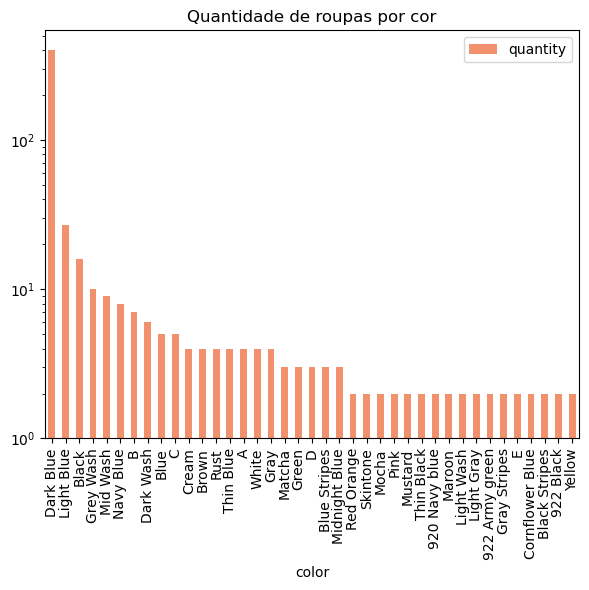

In [19]:
# Baseado no comando anterior para mostrar a quantidade de roupas por cor agora em gráfico
bars = dataset[['color','quantity']].groupby(['color']).sum().sort_values(by = 'quantity' , ascending = False) #grouping the data column and summing the quantity
bars.plot(kind='bar',log=True, color='#f1916d')    #assuming the y axis as logarithmic scale (#f1916d)
plt.title('Quantidade de roupas por cor')
plt.show()

In [20]:
# Comando usado para mostrar a quantidade de roupas por tamanho 
dataset['size'].value_counts()

size
XL          164
M            92
L            91
One Size     45
2XL          43
3XL          40
4XL           9
One SIze      5
S             1
Name: count, dtype: int64

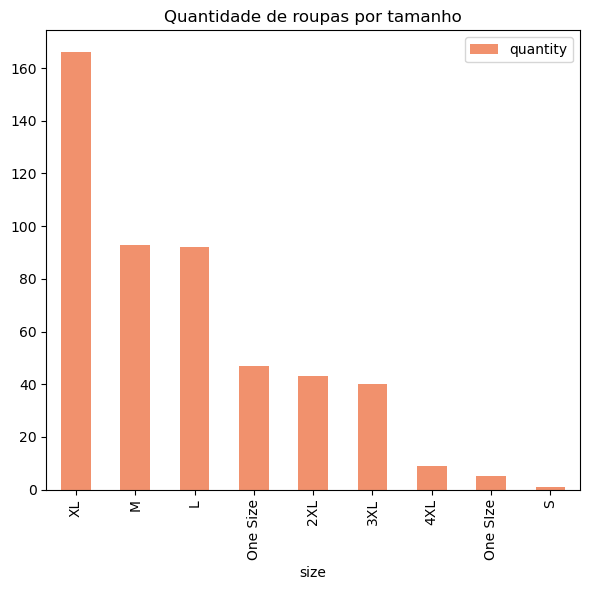

In [21]:
# Baseado no comando anterior para mostrar a quantidade de roupas por tamanho agora em gráfico
bars = dataset[['size','quantity']].groupby(['size']).sum().sort_values(by = 'quantity' , ascending = False)
bars.plot(kind='bar',color = '#f1916d')
plt.title('Quantidade de roupas por tamanho')
plt.show()


Aqui se inicia as analises visando a receita!


In [22]:
# Comando usado para mostar a distribuição das roupas por preço unitário 
dataset[['unit_price','quantity']].groupby(['unit_price']).sum().sort_values(by = 'quantity' , ascending = False)

,quantity
unit_price,
288.0,138
266.0,81
278.0,70
298.0,44
265.0,24
258.0,21
264.0,20
269.0,20
268.0,17


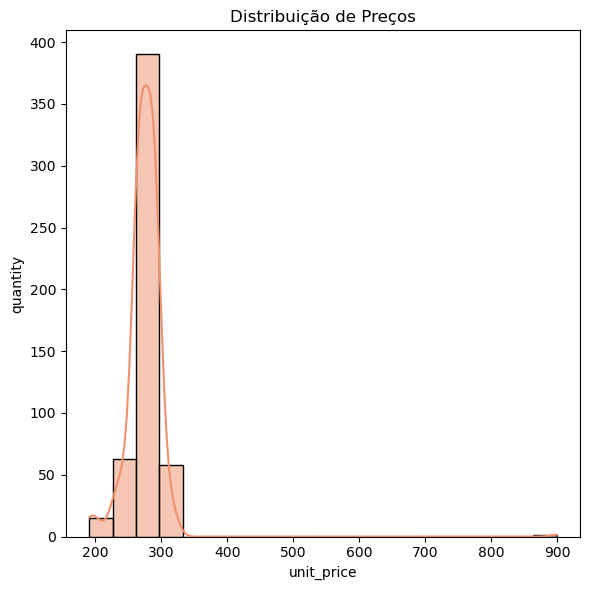

In [23]:
# Baseado no comando anterior para mostrar a quantidade de roupas por tamanho agora em gráfico
sns.histplot(dataset['unit_price'], bins=20, kde=True, color="#f1916d")
plt.title('Distribuição de Preços')
plt.xlabel('unit_price')
plt.ylabel('quantity')
plt.show()

In [24]:
# Cria uma nova coluna 'mês' contendo cada pedido
dataset['day'] = dataset['order_date'].dt.day
dataset['month'] = dataset['order_date'].dt.month
dataset['year'] = dataset['order_date'].dt.year

In [25]:
dataset.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue,day,month,year
0,1,2022-06-01 16:05:00,708,Dark Blue,2XL,298.0,1,298.0,1,6,2022
1,1,2022-06-01 16:05:00,89,Dark Blue,2XL,258.0,1,258.0,1,6,2022
2,2,2022-06-10 17:03:00,bobo,Cream,One Size,228.0,1,228.0,10,6,2022
3,3,2022-06-10 19:59:00,799,Dark Blue,XL,264.0,1,264.0,10,6,2022
4,4,2022-06-11 11:42:00,799,Dark Blue,M,264.0,1,264.0,11,6,2022


In [26]:
# Comando usado para mostrar a receita por SKU 
receita_sku = dataset[['sku','revenue']].groupby(['sku']).sum().sort_values(by = 'revenue' , ascending = False)
receita_sku

,revenue
sku,
799,79182.0
708,29146.0
9699,4896.0
239,4199.0
77,4055.0
bobo,3595.0
89,3341.0
79,2817.0
3799,2390.0


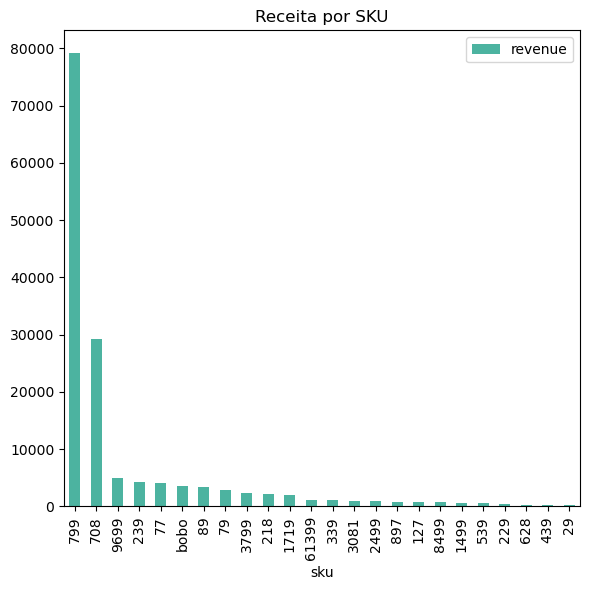

In [27]:
# Gráfico da receita por SKU
receita_sku = dataset[['sku','revenue']].groupby(['sku']).sum().sort_values(by = 'revenue' , ascending = False)
receita_sku.plot(kind='bar',color = '#4CB3A0')
plt.title('Receita por SKU')
plt.show()


# O volume de vendas parece ser muito maior para o sku 799 e assim é normal ter uma receita maior. 
# É válido prestar atenção no preço médio, ao invés disso? 
# Poderia buscar saber se o preço para os skus se mantêm constante com o tempo.

In [28]:
# Comando usado para mostrar a receita por cor
dataset[['color','revenue']].groupby(['color']).sum().sort_values(by = 'revenue' , ascending = False)

,revenue
color,
Dark Blue,112364.0
Light Blue,7337.0
Black,4428.0
Grey Wash,2390.0
Mid Wash,2043.0
Navy Blue,1693.0
B,1491.0
Dark Wash,1311.0
C,975.0


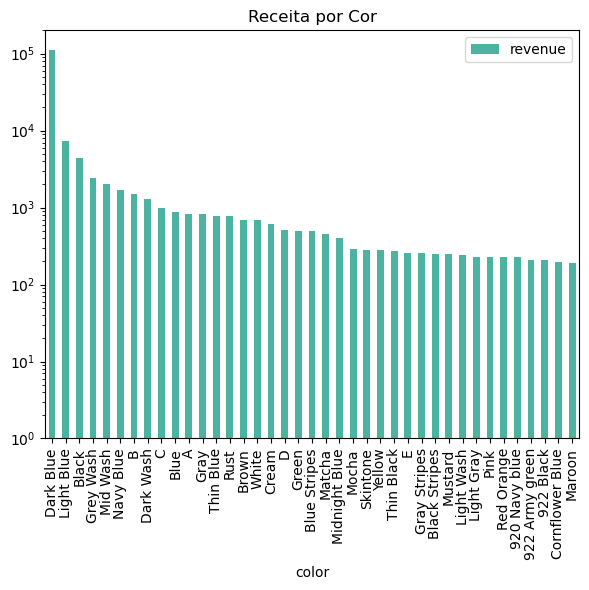

In [29]:
# Gráfico da receita por cor
receita_cor = dataset[['color','revenue']].groupby(['color']).sum().sort_values(by = 'revenue' , ascending = False) #grouping the data column and summing the quantity
receita_cor.plot(kind='bar',log=True, color='#4CB3A0')    #assuming the y axis as logarithmic scale (#f1916d)
plt.title('Receita por Cor')
plt.show()

In [30]:
# Comando usado para mostrar a receita por tamanho das roupas
dataset[['size','revenue']].groupby(['size']).sum().sort_values(by = 'revenue' , ascending = False)

,revenue
size,
XL,45868.0
M,25755.0
L,25362.0
2XL,12422.0
One Size,11793.0
3XL,11301.0
4XL,3205.0
One SIze,990.0
S,227.0


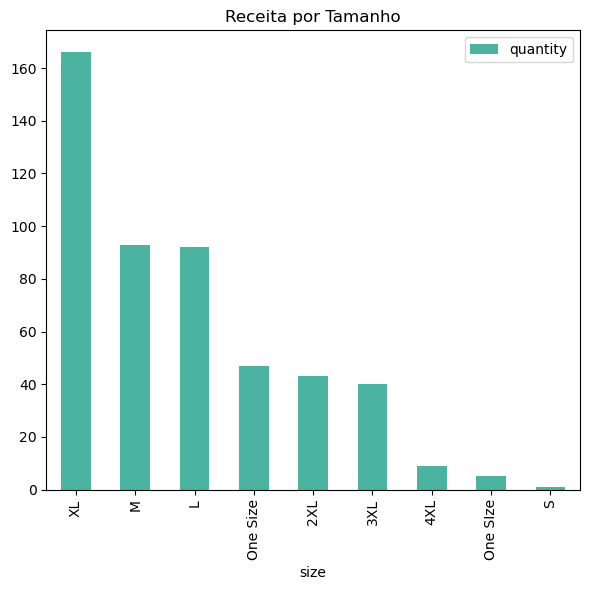

In [31]:
# Gráfico da receita por tamanho das roupas
receita_tamanho = dataset[['size','quantity']].groupby(['size']).sum().sort_values(by = 'quantity' , ascending = False)
receita_tamanho.plot(kind='bar',color = '#4CB3A0')
plt.title('Receita por Tamanho')
plt.show()

In [32]:
# Comando usado para mostrar a receita por mês
vendas_mes = dataset[['month','revenue']].groupby(['month']).sum().sort_values(by = 'revenue' , ascending = False)
vendas_mes

,revenue
month,
9,46572.0
8,42513.0
7,32175.0
6,25259.0


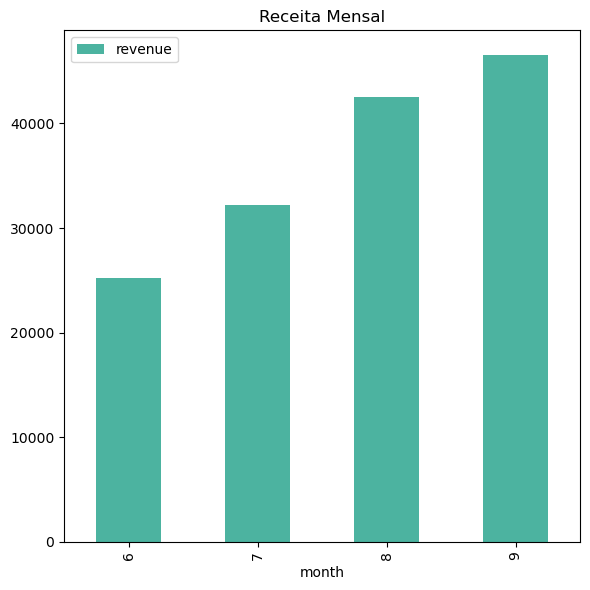

In [33]:
# Gráfico da receita mensal
receita_mes = dataset[['month','revenue']].groupby(['month']).sum()
receita_mes.plot(kind='bar',color = '#4CB3A0')
plt.title('Receita Mensal')
plt.show()

# Nesse caso podemos notar uma tendencia no aumento das vendas mensais!

In [34]:
# Comando usado para mostrar a receita por ano
# Nosso amostras dos dados é pequena contando apenas de um ano!
vendas_ano = dataset[['year','revenue']].groupby(['year']).sum().sort_values(by = 'revenue' , ascending = False)
vendas_ano

,revenue
year,
2022,146519.0


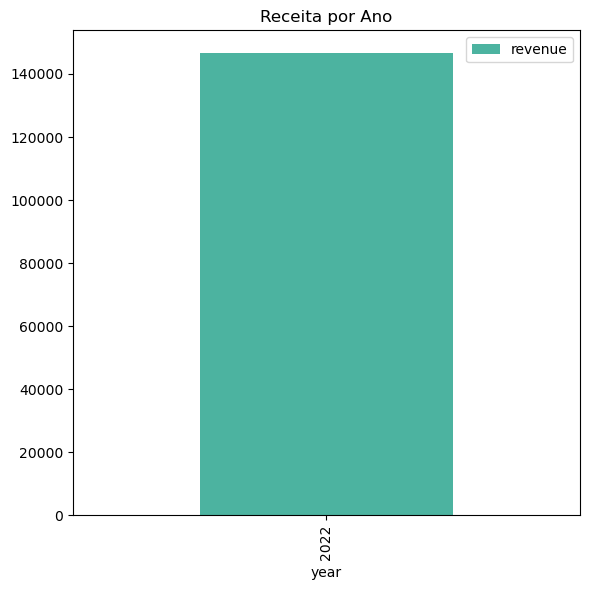

In [35]:
# Gráfico da receita anual
receita_ano = dataset[['year','revenue']].groupby(['year']).sum()
receita_ano.plot(kind='bar',color = '#4CB3A0')
plt.title('Receita por Ano')
plt.show()

In [36]:
# Determina o valor mínimo, máximo e a média da receita das vendas
dataset['revenue'].agg(['min', 'max', 'mean'])

min     191.000000
max     899.000000
mean    278.024668
Name: revenue, dtype: float64

In [37]:
# Determina o desvio padrão das receitas
round(dataset['revenue'].std(),2)

44.74

In [38]:
# Determina o total das vendas (Coluna: 'revenue')
round(dataset['revenue'].sum(),2)

146519.0

In [39]:
dataset.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue,day,month,year
0,1,2022-06-01 16:05:00,708,Dark Blue,2XL,298.0,1,298.0,1,6,2022
1,1,2022-06-01 16:05:00,89,Dark Blue,2XL,258.0,1,258.0,1,6,2022
2,2,2022-06-10 17:03:00,bobo,Cream,One Size,228.0,1,228.0,10,6,2022
3,3,2022-06-10 19:59:00,799,Dark Blue,XL,264.0,1,264.0,10,6,2022
4,4,2022-06-11 11:42:00,799,Dark Blue,M,264.0,1,264.0,11,6,2022


Agora damos inicio ao aprendizado de máquina que no nosso caso iremos utilizar a regressão linear

In [40]:
# Como não podemos ter um valor textual na coluna SKU nessa etapa do projeto então teremos que tratar
# o SKU de nome 'bobo' conforme abaixo!

# A primeira forma seria excluir todo o registro, mas estariamos perdendo dados.
#dataset.drop(dataset.loc[dataset['sku']=='bobo'].index, inplace=True)

# Logo após substituiriamos a palavra SEM VALOR pelo valor ZERO
dataset.loc[(dataset['sku'] == 'bobo'), 'sku'] = 0

In [41]:
# Separa as features
x = dataset[['sku', 'color', 'size']]

In [42]:
# Separa a rotulação
y = dataset['revenue']

In [43]:
# Divisão do conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=42)

In [44]:
# A regressão linear fuinciona melhor com valores numericos de 0 e 1, então iremos transformar 
# os dados das colunas 'color' e 'size' em valores numéricos para usá-los no treino, através do
# OneHotEncoder ou pandas.get_dummies no nosso caso utilizamos o OneHotEncoder!

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cols_train = pd.DataFrame(encoder.fit_transform(X_train[['color', 'size']]))
encoded_cols_test = pd.DataFrame(encoder.transform(X_test[['color', 'size']]))

In [45]:
encoded_cols_train.columns = encoder.get_feature_names_out()
encoded_cols_test.columns = encoder.get_feature_names_out()

In [46]:
encoded_cols_train.index = X_train.index
encoded_cols_test.index = X_test.index

In [47]:
num_X_train = X_train.drop(['color', 'size'], axis=1)
num_X_test = X_test.drop(['color', 'size'], axis=1)

In [48]:
encoded_X_train = pd.concat([num_X_train, encoded_cols_train], axis=1)
encoded_X_test = pd.concat([num_X_test, encoded_cols_test], axis=1)

In [49]:
# Criar modelo Regressão Linear
modelo = LinearRegression()

In [50]:
#treinar
modelo.fit(encoded_X_train, y_train)

LinearRegression()

In [51]:
#predição
predicao = modelo.predict(encoded_X_test)

In [52]:
#resposta esperada do modelo
y_test

312    278.0
393    198.0
6      264.0
281    288.0
78     268.0
       ...  
289    269.0
24     288.0
17     228.0
275    288.0
66     258.0
Name: revenue, Length: 159, dtype: float64

In [53]:
modelo.coef_

array([ 6.02372868e-04, -4.21034306e+01, -1.53445860e+00, -1.84344586e+01,
        7.41473431e+01, -4.17182661e+00, -4.78030143e+01, -8.63117037e+00,
       -1.97011253e+01,  1.14308122e+01,  1.30863652e+02,  3.09347628e+01,
       -3.01857359e+00, -7.03445860e+00,  6.53462367e+00,  2.82817339e+00,
       -1.11922803e+01,  1.64125173e+01,  3.14927947e+01, -1.32128490e+01,
       -6.01363476e+01, -2.31363476e+01, -6.21861915e+00,  1.14308122e+01,
       -2.01320430e+01, -2.41337649e+01, -2.31363476e+01, -2.31363476e+01,
        1.28679570e+01,  1.28679570e+01,  1.58281734e+01,  1.58281734e+01,
       -2.94682461e+01,  1.28679570e+01,  1.20360254e+01,  5.82393932e+00,
        1.53785882e+01, -2.00569131e+00,  3.76577410e+00, -6.14871789e+01,
        4.93589176e+00,  2.76503137e+00,  1.87876200e+01])

In [54]:
modelo.score(encoded_X_test, y_test)

0.013516142317044233

In [55]:
mean_squared_error(predicao, y_test)

# Se buscar o RMSE, pode-se passar um argumento squared=False

3861.9468326879314

In [56]:
from scipy import stats
import pandas as pd
# Teste de hipótese para comparar a média de vendas de roupas em dois tamanhos diferentes (4XL e M).
dataset = pd.read_csv(url)
dataset
# Extraindo as vendas de roupas nos tamanhos 4XL e M.
categoria_4XL = dataset[dataset['size'] == '4XL']['revenue']
categoria_M = dataset[dataset['size'] == 'M']['revenue']

# Realizando o teste de hipótese
t_statistic, p_value = stats.ttest_ind(categoria_4XL, categoria_M)
print("Teste de Hipótese 1:")
print("Estatística t:", t_statistic)
print("Valor p:", p_value)
if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre as médias de vendas das categorias.")
else:
    print("Não rejeitamos a hipótese nula. Não há diferença significativa entre as médias de vendas das categorias.")

Teste de Hipótese 1:
Estatística t: 3.2576484323511807
Valor p: 0.0015394691784946807
Rejeitamos a hipótese nula. Há uma diferença significativa entre as médias de vendas das categorias.
